Bagging: Bootstrap yöntemi ile oluşturulan birden fazla karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
*Bagging => Bootstrap Aggregation kelimelerinden türetilmiştir.
 
- RMSE değerini düşürür.
- Varyansı düşük, ezberlemeye karşı dayanıklı.


- Random Forests yöntemi **Bagging** ve **Random Subspace** yöntemlerinin birleşimi ile oluşmuştur. Bagginge ek olarak değişken seçiminde de rassallık mümkün.
- Ağaçlar için gözlemler bootstrap, değişkenler random subspace yöntemi ile seçilir.
- Her düğüm noktasında rastgele değişken seçimi yapılır. (reg. p/3, sınıflandırma sqrt(p))

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

In [3]:
df = pd.read_csv("../Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League","Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["League", "Division" , "NewLeague" ,"Salary"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N","Division_W", "NewLeague_N"]]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=33)

In [4]:
rf_model = RandomForestRegressor(random_state=33).fit(X_train,y_train)

In [5]:
rf_model

RandomForestRegressor(random_state=33)

In [6]:
y_pred = rf_model.predict(X_test)

In [7]:
np.sqrt(mean_squared_error(y_test, y_pred))

240.20040902096247

## **Model Tuning**

In [8]:
rf_params = {"max_depth": [5,8,10],
             "max_features": [2,5,10],
             "n_estimators": [200, 500, 1000, 2000],
             "min_samples_split": [2, 10, 80, 100]}

In [9]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv = 10, n_jobs = -1, verbose =2).fit(X_train, y_train)

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


C:\Users\acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [10]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [11]:
rf_tuned = RandomForestRegressor(random_state=33, max_depth=10, max_features=2, min_samples_split=2, n_estimators=500, n_jobs=-1).fit(X_train, y_train)

In [12]:
y_pred = rf_tuned.predict(X_test)

In [13]:
np.sqrt(mean_squared_error(y_test, y_pred))

231.00793641093313

## Feature seletion

In [14]:
rf_tuned.feature_importances_*100

array([5.7086593 , 6.4201682 , 3.79633488, 5.83993465, 6.73476593,
       7.66198029, 4.32253472, 9.27909361, 9.31478184, 6.69908724,
       8.50409931, 8.51836707, 7.8122616 , 3.98999544, 2.12113512,
       1.79971566, 0.36868179, 0.65089667, 0.45750668])

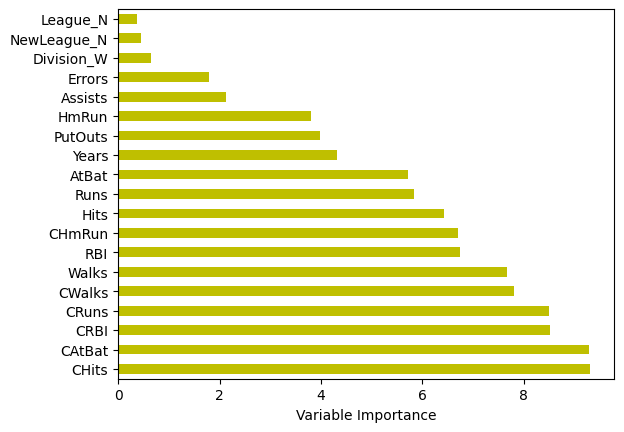

In [15]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending=False).plot(kind = "barh", color = "y")
plt.xlabel("Variable Importance")
plt.gca().legend_ = None